# Region of Interest

In [1]:
import os
import geopandas as gpd
from shapely.geometry import Polygon
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display

print('All libraries successfully imported!')
print(f'GeoPandas : {gpd.__version__}')

All libraries successfully imported!
GeoPandas : 0.9.0


## Set directory

In [2]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_letter    = 'X'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/'

# Directory where ROI shapefile is stored
roi_path = f'{work_path}ROI/'

# Create ROI path if not exists
Path(roi_path).mkdir(parents=True, exist_ok=True)

## Choose CRS of your ROI

Choose the same CRS as the Sentinel data.

WGS 84 / UTM zone 31N

In [3]:
crs_dst = 'EPSG:32631'

## Give a name for the ROI shapefile

Tip : You can include the EPSG code in the filename!

In [4]:
roi_name = 'extent_roi'

roi_filename = f'{roi_name}_{crs_dst[5:]}.shp'

roi_file = f'{roi_path}{roi_filename}'

print(f'ROI shapefile will be stored in : {roi_file}')

ROI shapefile will be stored in : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/ROI/extent_roi_32631.shp


## Find the coordinates of your ROI bounding box (bbox)

To find the coordinates of a bounding box, check: http://bboxfinder.com/

**!! Be carefull of the crs_src you chose !!**


In [5]:
crs_src = 'EPSG:32631'
#bbox    = [627263.7,5596175.1,637115,5590485.2]
bbox    = [627263.7,5590485.2,637115,5596175.1]

ulx = bbox[0]
uly = bbox[1]
lrx = bbox[2]
lry = bbox[3]

print(f'Upper Left X  : {ulx}')
print(f'Upper Left Y  : {uly}')
print(f'Lower Right X : {lrx}')
print(f'Lower Right Y : {lry}')

Upper Left X  : 627263.7
Upper Left Y  : 5590485.2
Lower Right X : 637115
Lower Right Y : 5596175.1


## Store your ROI into a GeoDataFrame

In [9]:
# Create a list with the longitude coordinates (x)
lon_point_list = [ulx, lrx, lrx, ulx, ulx]

# Create a list with the latitude coordinates (y)
lat_point_list = [uly, uly, lry, lry, uly]

# Create a polygon object from the two list (lon and lat)
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))

# Create a GeoDataFrame with the polygon object
gdf = gpd.GeoDataFrame(index=[0], crs=crs_src, geometry=[polygon_geom])       

# Reproject the GeoDataFrame to the destination CRS (needed only if you set your coordinates in WGS 84)
gdf = gdf.to_crs(crs_dst)

display(gdf)

# Check CRS of your polygon
print(f'ROI CRS : {gdf.crs}')

,geometry
0,"POLYGON ((627263.700 5590485.200, 637115.000 5..."


ROI CRS : EPSG:32631


### Add a name

In [10]:
gdf['name'] = 'ROI_wallonia'

display(gdf)

,geometry,name
0,"POLYGON ((627263.700 5590485.200, 637115.000 5...",ROI_wallonia


## Plot your ROI

Is it a nice rectangular polygon?

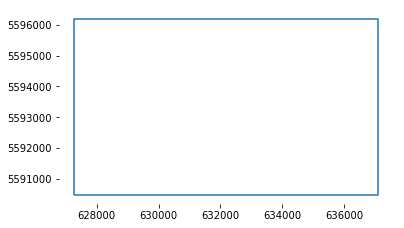

In [11]:
fig, ax = plt.subplots(1, 1)

gdf.boundary.plot(ax=ax)

plt.box(False)


## Write GeoDataFrame in a shapefile if not exists

In [13]:
if not os.path.isfile(roi_file):
    gdf.to_file(filename=roi_file, driver='ESRI Shapefile')
    print(f'A new vector file is created : {roi_file}')

else:
    print('The ROI vector file already exists --> delete it or change the variable "roi_name" if you want to create a new one')

The ROI vector file already exists --> delete it or change the variable "roi_name" if you want to create a new one
